In [8]:
import numpy as np

In [9]:
K = int(input("Enter the degree of the polynomial K: "))
while True:
    a = float(input("Enter the start of the range a: "))
    b = float(input("Enter the end of the range b: "))
    if a < b:
        break
    else:
        print("The start of the range must be less than the end of the range. Please try again.")

N = int(input("Enter the number of data points N: "))

X = np.linspace(a, b, N)

theta_true = np.ones((K+1,))

def poly(x,theta):
    y = 0
    for i in range(len(theta_true)):
         y += theta[i] * x**i 
    return y

sigma = float(input("Enter the variance of the Gaussian noise sigma^2: "))
Y = poly(X, theta_true) + np.random.normal(0, np.sqrt(sigma), N)
print("Generated test dataset:")
print("X:", X)
print("Y:", Y)

Generated test dataset:
X: [ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
Y: [4.77606971e-01 1.14891887e+00 2.13903769e+00 3.10713980e+00
 3.09556625e+00 4.14729387e+00 6.36054347e+00 7.28868903e+00
 9.31812967e+00 1.22903348e+01 1.57152747e+01 2.09184563e+01
 2.38602788e+01 2.95716011e+01 3.43513510e+01 4.17395532e+01
 5.04944389e+01 5.73344076e+01 6.73821493e+01 7.84827358e+01
 9.00084689e+01 1.02687378e+02 1.16306710e+02 1.3019190

In [10]:
import numpy as np

def compute_vandermonde_matrix(X, K):
    """Compute the Vandermonde matrix for the input data and a given polynomial degree."""
    return np.vander(X, K+1, increasing=True)

def maximum_likelihood_estimation(X, Y, K):
    """Compute the MLE for a polynomial regression model of degree K."""
    # Compute the Vandermonde matrix for the transformed features
    vander_X = compute_vandermonde_matrix(X, K)
    
    # Compute the MLE estimate using the normal equation
    # theta_MLE = (X^T * X)^(-1) * X^T * Y
    theta_MLE = np.linalg.inv(vander_X.T.dot(vander_X)).dot(vander_X.T).dot(Y)
    
    return theta_MLE


theta_MLE = maximum_likelihood_estimation(X, Y, K)
print(theta_MLE)

[1.1485837  1.03575633 0.95198082 1.00505549]


The Mean Absolute Error of the model is: 0.47833193930800716


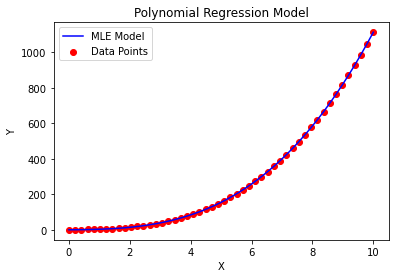

In [11]:
import matplotlib.pyplot as plt

def evaluate_model(X, Y, theta):
    """Evaluate the model using Mean Absolute Error."""
    predictions = compute_vandermonde_matrix(X, len(theta)-1).dot(theta)
    return np.mean(np.abs(predictions - Y))

def plot_model(X, Y, theta):
    """Plot the model against the data."""
    plt.scatter(X, Y, color='red', label='Data Points')
    X_plot = np.linspace(min(X), max(X), 1000)  # finer grid for a smoother curve
    Y_plot = compute_vandermonde_matrix(X_plot, len(theta)-1).dot(theta)
    plt.plot(X_plot, Y_plot, color='blue', label='MLE Model')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression Model')
    plt.show()

# Evaluate the model
error = evaluate_model(X, Y, theta_MLE)
print(f"The Mean Absolute Error of the model is: {error}")

# Plot the model
plot_model(X, Y, theta_MLE)
